# K-Nearest Neighboor

Objective: Use k-Nearest Neighboor for predict a data point.
What is K-Nearest Neighboor:It's an algoritm of supervised learning where the data are training with points of data that belong to the classification
¿How can I predict a point?
you need to consider the 'K' points nearest for determinate the classification
## The next picture show you the algoritm of K-Nearest Neighboor ando how it works
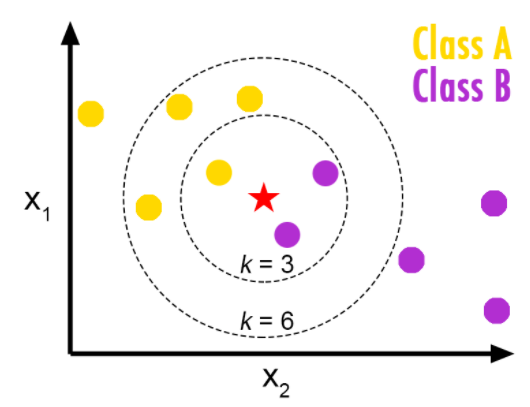

## Import Libraries

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import urllib.request

## About Data
Imagine a provider of telecommunications that segment the database of her clients by Service in for groups, if the demographic data can be used for predict the pertinence of group of sending, the company could personalize offers for prospects. 
This is a classification Problem.

This work going to focus on a dataset with demographic data like region, age, marital status, for predict patterns of use.


Download the Dataset

In [4]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'
filename = 'teleCust1000t.csv'
urllib.request.urlretrieve(url, filename)

('teleCust1000t.csv', <http.client.HTTPMessage at 0x170dd2eb070>)

In [5]:
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
df.isna().sum(axis=0)

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

For use the library sciki-learn we have to turn the dataframe of Pandas to Numpy array

In [24]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

which are the tickets in the dataset?
* custcat

In [28]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize the data

In [31]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train test split

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('Set de entrenamiento: ',X_train.shape,y_train.shape)
print('Set de prueba: ',X_test.shape,y_test.shape)

Set de entrenamiento:  (800, 11) (800,)
Set de prueba:  (200, 11) (200,)


## Classification
**Import library**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

## Training

I going to begin with the algorithm with K=4

In [44]:
k=4
#Train the model and predict
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## PREDICTION

In [81]:
yhat=neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 2, 4, 3, 3, 4, 3, 1, 1, 4, 3, 2, 2, 1, 3, 4, 3, 2, 3, 2,
       1, 4, 1, 3, 1, 1, 1, 1, 3, 1, 4, 2, 1, 2, 1, 1, 2, 2, 3, 4, 1, 1,
       4, 4, 3, 1, 4, 4, 2, 1, 2, 1, 2, 2, 3, 3, 1, 4, 1, 4, 2, 1, 3, 1,
       1, 2, 2, 1, 1, 3, 2, 3, 1, 1, 4, 1, 4, 3, 3, 1, 2, 1, 2, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 3, 1, 1, 4, 3, 2, 2, 2,
       1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 4, 3, 2, 3, 1, 1, 4, 3, 1, 2, 3, 1,
       1, 4, 3, 2, 3, 1, 1, 3, 4, 3, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       4, 3, 3, 3, 3, 4, 4, 1, 2, 3, 1, 4, 1, 1, 3, 2, 4, 4, 3, 2, 4, 2,
       3, 4, 1, 1, 3, 2, 1, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 4, 1, 3,
       2, 3], dtype=int64)

In [58]:
from sklearn import metrics
print('Entrenar el set de certeza: ',metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('Probar el set de Certeza: ',metrics.accuracy_score(y_test, yhat))

Entrenar el set de certeza:  0.5475
Probar el set de Certeza:  0.32


## Train the model with K=6

In [82]:
k=9
#Train the model and predict
neigh6=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh6

KNeighborsClassifier(n_neighbors=9)

In [91]:
yhat6=neigh.predict(X_test)
yhat6[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

In [90]:
a=neigh.predict_proba(X_test)
a[0:5]

array([[0.22222222, 0.        , 0.66666667, 0.11111111],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.11111111, 0.11111111, 0.44444444, 0.33333333],
       [0.11111111, 0.44444444, 0.11111111, 0.33333333],
       [0.11111111, 0.33333333, 0.        , 0.55555556]])

In [84]:
from sklearn import metrics
print('Entrenar el set de certeza: ',metrics.accuracy_score(y_train,neigh6.predict(X_train)))
print('Probar el set de Certeza: ',metrics.accuracy_score(y_test, yhat6))

Entrenar el set de certeza:  0.5025
Probar el set de Certeza:  0.34


What happen with K value?
This is the number of Nearest Neighboor for examine
Supouse that the user give the number, thus ¿How can I choose the correct value for K?
The general solution is divide a part of the data for train the currency of the model. 

In [78]:
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    #Train the model and predict
    neigh=neigh6=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

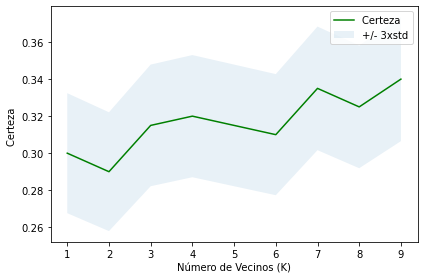

In [79]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

In [80]:
print('La mejor aproximación de certeza del modelo fue con: ',mean_acc.max(),' con k= ',mean_acc.argmax()+1)

La mejor aproximación de certeza del modelo fue con:  0.34  con k=  9
